<a href="https://colab.research.google.com/github/AlexandreSaldanha/AlexandreSaldanha/blob/main/MVP_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [96]:
Dataset2 = yf.download(tickers = ('VALE3.SA','ITUB4.SA','PETR4.SA','PETR3.SA','^BVSP'), start = '2023-1-1') [['Adj Close']]
Dataset2

[*********************100%***********************]  5 of 5 completed


Adj Close                                                
             ITUB4.SA   PETR3.SA   PETR4.SA   VALE3.SA          ^BVSP
Date                                                                 
2023-01-02  23.893167  22.264847  19.145512  87.478874  106376.000000
2023-01-03  23.395596  21.950058  18.661026  87.322311  104166.000000
2023-01-04  23.463890  22.315893  19.254103  87.478874  105334.000000
2023-01-05  24.195610  23.039053  19.947416  88.946640  107518.000000
2023-01-06  24.615135  22.894421  19.830473  90.355698  108836.000000
...               ...        ...        ...        ...            ...
2023-07-14  28.280001  32.549999  29.049999  68.610001  117711.000000
2023-07-17  28.830000  32.560001  28.990000  67.849998  118219.000000
2023-07-18  28.270000  32.279999  28.830000  67.419998  117841.000000
2023-07-19  27.969999  32.459999  29.100000  67.239998  117552.000000
2023-07-20  28.480000  32.740002  29.200001  67.639999  118111.867188

[138 rows x 5 columns]

<Axes: xlabel='Date'>

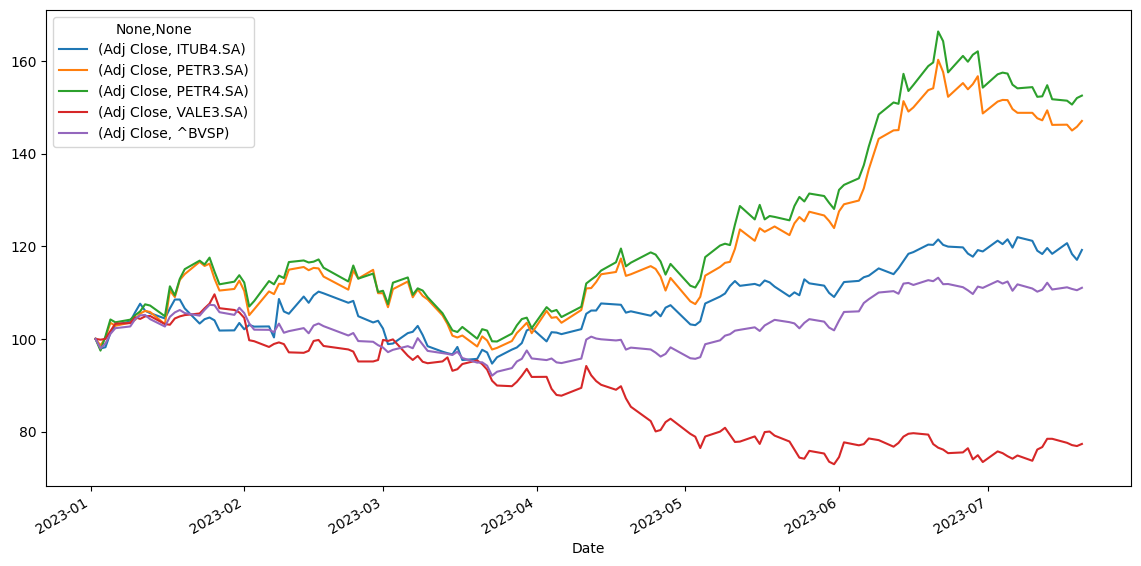

In [97]:
(Dataset2/Dataset2.iloc[0]*100).plot(figsize=(14,7))

In [100]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = Dataset2.values
X = array[:,0:4] # atributos
y = array[:,4] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

In [101]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

In [102]:

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

In [103]:
# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

LR: MSE 2315729.85 (1179134.96) - RMSE 1521.75
Ridge: MSE 2344864.20 (1050699.62) - RMSE 1531.29
Lasso: MSE 2319610.88 (1103534.02) - RMSE 1523.03
KNN: MSE 1827954.98 (1226338.44) - RMSE 1352.02
CART: MSE 1724977.83 (1105816.23) - RMSE 1313.38
SVM: MSE 33785064.92 (8087048.62) - RMSE 5812.49


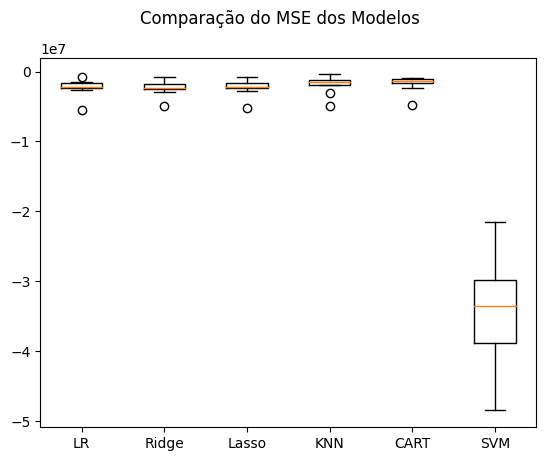

In [104]:

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [105]:
# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 2372358.58
RMSE 1540.25
